In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import pandas as pd

Using TensorFlow backend.


In [2]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '\images'
data_dir_list = os.listdir(data_path)
data_dir_list.sort() #good initial sort but doesnt sort numerically very well
data_dir_list = sorted(data_dir_list)

In [3]:
import csv
from os.path import splitext
img_rows=128
img_cols=128
num_channel=1
num_epoch=10
data_path_label = PATH + '\style_filter.csv'
print(data_path_label)
styledf=pd.read_csv(data_path_label)
styledf.sort_values("id", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
styledf = styledf.loc[:, ~styledf.columns.str.contains('^Unnamed')]
styledf
styledf= styledf.sort_values(by=['id'])

C:\Users\rohit\Downloads\style_filter.csv


In [4]:
styledf.head()
styledf.loc[styledf['id'].astype(str) == '1163']

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
4045,1163,Men,Apparel,Topwear,Shirts,Blue,Summer,2011.0,Sports,Nike Sahara Team India Fanwear Round Neck Jersey


In [5]:
count = 0
flag = True
if(flag==True):
    
    img_data_list=[]
    id_list = []
    label_list = []
    imageDataframe  = pd.DataFrame(columns=['id', 'colorcode'])
    for img in data_dir_list:
        count = count + 1
        #df = styledf.loc[styledf['id'].isin(splitext(img)[0])]
       # dropping null value columns to avoid errors 
        styledf.dropna(inplace = True) 
        d = styledf.loc[styledf['id'].astype(str) == splitext(img)[0]]
        # display 
        if not d.empty:
            k = d.head(1).articleType.values
            label_list.append(k)
            input_img=cv2.imread(data_path + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(128,128))
            img_data_list.append(input_img_resize)
            id_list.append(splitext(img)[0])
            imageDataframe = imageDataframe.append({'id': splitext(img)[0], 'colorcode': input_img}, ignore_index=True)
            if count > 1000:
                break


In [6]:
styledf = styledf.loc[styledf['id'].isin(id_list)]
styledf= styledf.sort_values(by=['id'],ascending=True)
label_list =styledf['articleType'].iloc[:].values
print(label_list,id_list)
len(label_list)

['Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Trouser'
 'Trouser' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Trouser' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts'
 'Shirts' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes'
 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes'
 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shoes'
 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes' 'Shoes'
 'Shoes' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts'
 'Shirts' 'Shirts' 'Shirts' 'Shirts' 'Shirts' '

515

In [7]:

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)



(515, 128, 128)


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

encoded_data, mapping_index = pd.Series(label_list).factorize()
s = pd.Series(label_list, dtype="category")
y = pd.factorize(s)[0]
d = pd.factorize(s)
print(encoded_data)
label_list = encoded_data
print(mapping_index)
label_len = len(y)


labels = np.array(label_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
print(styledf['articleType'].nunique())

Y = np_utils.to_categorical(labels, label_len)
Y

[0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 2 2 2 0
 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#Shuffle the dataset
img_data= np.expand_dims(img_data, axis=4) 
print (img_data.shape)
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train.shape)
#X_train = X_train.reshape(412,128, 128, 1)



(515, 128, 128, 1)
(412, 128, 128, 1)


C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [10]:
num_epoch = 10

In [11]:
#%%
# Defining the model
input_shape=img_data[0].shape
print(input_shape)
					
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=(128, 128,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(label_len))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

# Viewing model_configuration

(128, 128, 1)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  
C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  from ipykernel import kernelapp as app


In [12]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [13]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
__________

True

In [14]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.


C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 412 samples, validate on 103 samples
Epoch 1/10
412/412 [==============================] - 11s 28ms/step - loss: 2.5776 - acc: 0.7864 - val_loss: 1.8076 - val_acc: 0.8932
Epoch 2/10
412/412 [==============================] - 11s 26ms/step - loss: 1.0125 - acc: 0.8083 - val_loss: 2.2607 - val_acc: 0.9029
Epoch 3/10
412/412 [==============================] - 11s 27ms/step - loss: 0.6113 - acc: 0.8641 - val_loss: 1.0203 - val_acc: 0.9612
Epoch 4/10
412/412 [==============================] - 12s 28ms/step - loss: 0.2882 - acc: 0.9029 - val_loss: 0.1352 - val_acc: 1.0000
Epoch 5/10
412/412 [==============================] - 11s 28ms/step - loss: 0.2227 - acc: 0.9466 - val_loss: 0.0827 - val_acc: 0.9515
Epoch 6/10
412/412 [==============================] - 11s 28ms/step - loss: 0.2390 - acc: 0.9320 - val_loss: 0.0180 - val_acc: 1.0000
Epoch 7/10
412/412 [==============================] - 12s 28ms/step - loss: 0.3312 - acc: 0.9490 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 8/10
412/4

10


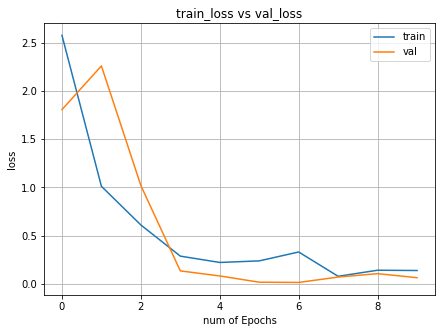

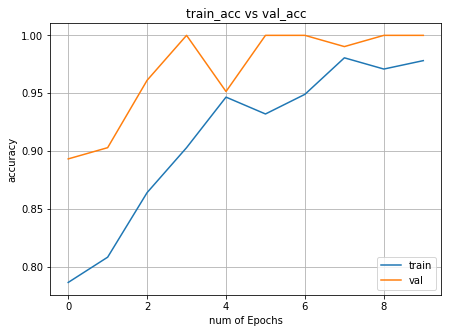

In [15]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)
print(len(train_loss))
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic']

In [18]:
score = model.evaluate(X_test, y_test,  verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[9:10]
print(model.predict_classes(test_image))

Test Loss: 0.703946590423584
Test accuracy: 0.8888888955116272
[0]


(256, 256)


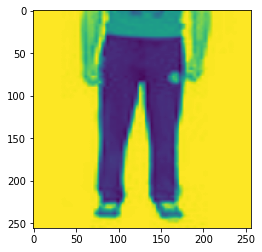

In [30]:
# Testing a new image
test_image = cv2.imread(data_path + '/'+ '21379.jpg' )
 
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(256,256))
plt.imshow(test_image) 
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

In [31]:
print(test_image)
test_image =  test_image.reshape(1,256, 256, 1)
#test_image= np.expand_dims(test_image, axis=4) 
print (test_image.shape)
# Predicting the test image
#print((model.predict(test_image)))
Labelclass = model.predict_classes(test_image)
if Labelclass == 0:
    print('Shirt')
if Labelclass == 2:
    print('Shoe')
if Labelclass == 1:
    print('Trouser')

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(1, 256, 256, 1)
Shirt


In [25]:
#Merging image and label data
imageDataframe.dtypes
#Object to int conversion
imageDataframe["id"]= imageDataframe["id"].astype(int)
imageDataframe.dtypes
df = pd.merge(styledf,
                 imageDataframe[['id', 'colorcode']],
                 on='id')
colorframe = imageDataframe['colorcode']
myarray = np.asarray(colorframe)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df)

       id gender masterCategory subCategory articleType    baseColour  season  \
0   10003  Women        Apparel     Topwear      Shirts         White    Fall   
1   10005    Men        Apparel     Topwear      Shirts          Blue    Fall   
2   10006    Men        Apparel     Topwear      Shirts         Black    Fall   
3   10007  Women        Apparel     Topwear      Shirts         White    Fall   
4   10008    Men        Apparel     Topwear      Shirts     Navy Blue    Fall   
5   10009    Men        Apparel     Topwear      Shirts           Red    Fall   
6   10010    Men        Apparel     Topwear      Shirts         Black    Fall   
7   10011    Men        Apparel  Bottomwear     Trouser  Grey Melange  Summer   
8   10012    Men        Apparel  Bottomwear     Trouser     Navy Blue    Fall   
9   10013    Men        Apparel     Topwear      Shirts        Yellow    Fall   
10  10015    Men        Apparel     Topwear      Shirts         White    Fall   
11  10019  Women        Appa

In [ ]:
X = img_data
X

In [ ]:
#Loading labels
labels = df['articleType']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

encoded_data, mapping_index = pd.Series(labels).factorize()
s = pd.Series(labels, dtype="category")
y = pd.factorize(s)[0]
d = pd.factorize(s)
print(encoded_data)
df['class'] = encoded_data
print(mapping_index)
label_len = len(y)
df

In [ ]:
#Shuffle the dataset
x,y = shuffle(img_data,y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

In [ ]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(128, 128)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(128,128))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled

#%%


In [ ]:
print(img_data)

In [ ]:
input_shape=img_data[0].shape
print(input_shape)

In [ ]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
# Define the model structure
model = Sequential()
model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=(128,128,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(14))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [ ]:
#one-hot encode target column
#from keras.utils import np_utils
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#print(y_test)
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

In [ ]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model_1 = model.fit(X_train, y_train,
                    batch_size=300,
                    epochs = 20,
                    verbose=1,
                    validation_data=(X_test, y_test))

In [ ]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)
print(xc)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
test_image = X_test[0:1]

In [ ]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

In [ ]:
import matplotlib.pyplot as plt

sample = []
test_image=cv2.imread(data_path + '/'+ '59263.jpg' )
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = image.load_img(data_path + '/'+ '11244.jpg', target_size=(128,128,1), grayscale=True)

plt.imshow(test_image)  
test_image = image.img_to_array(test_image)
test_image = test_image/255
sample.append(img)
Z = np.array(sample)
print (Z.shape)

In [ ]:
# Predicting the test image
print((model.predict(Z)))
print(model.predict_classes(Z))